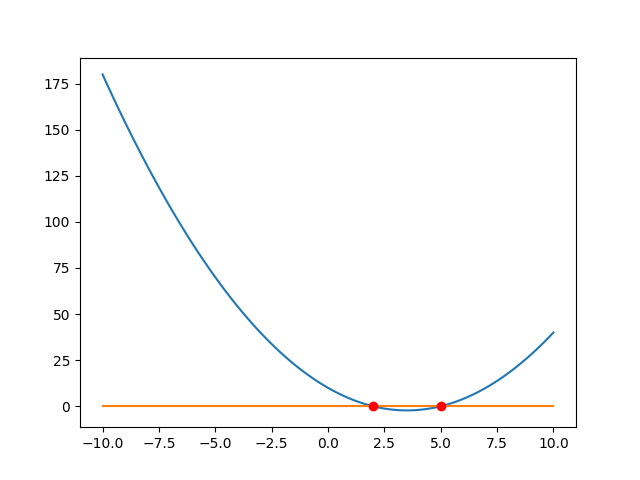

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import sympy as sym
sym.init_printing()
# Define the function and its derivative
x = sym.symbols('x')
f = x**2 -7*x + 10
fprime = sym.diff(f)

# Convert to Python functions
f = sym.lambdify(x, f)
fprime = sym.lambdify(x, fprime)

# newton raphson method

def newton_raphson(f, fprime, x0, tol):
    x1 = x0 - f(x0)/fprime(x0)
    while abs(x1 - x0) > tol:
        x0 = x1
        x1 = x0 - f(x0)/fprime(x0)
    return x1

# Plot the function and its roots
x = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(x, f(x))
plt.plot(x, 0*x)
plt.plot(newton_raphson(f, fprime, -100, 1e-6), 0, 'ro')
plt.plot(newton_raphson(f, fprime, 8, 1e-6), 0, 'ro')
plt.show()



steps 6
[array([6.]), array([5.2]), array([5.01176471]), array([5.00004578]), array([5.]), array([5.]), array([5.])]


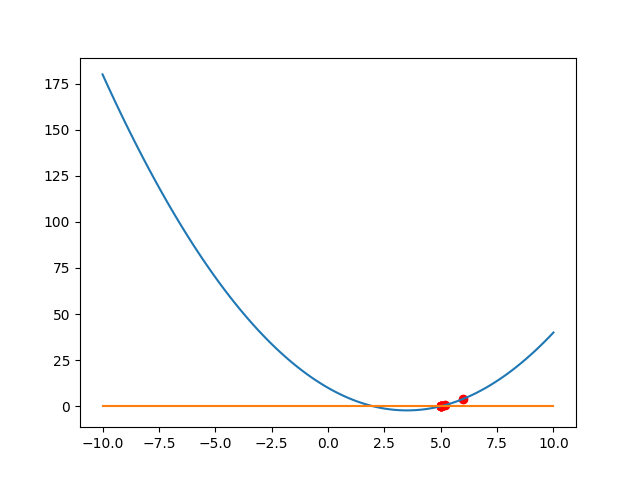

In [12]:
def machineEpsilon(func=np.float64):
    machine_epsilon = func(1)
    while func(1)+machine_epsilon != func(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)
    return machine_epsilon_last

sqeps = np.sqrt(machineEpsilon())

def D(f, x, h=sqeps):
    j = np.zeros(len(x))
    for i in range(len(x)):
        j[i] = (f(x + h * x[i] * np.eye(len(x))[i]) - f(x - h * x[i] * np.eye(len(x))[i])) / (2 * h * x[i])
    return j.T

def f(x):
    return x**2 -7*x + 10

def newtonstepp(f, x0):
    x1 = x0 - f(x0) / D(f, x0)
    return x1

x0 = np.array([8])
steps = []
for i in range(100):
    x0 = newtonstepp(f, x0)
    steps.append(x0)
    if x0[0] == 5.0:
        print("steps", i)
        break



print(steps)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.scatter(steps, f(np.array(steps)), c='r')
ax.plot(x, 0*x)

